In [1]:
import pandas as pd
import sys
sys.path.append("../../Model/")

import modules.preprocessing.sampling as sampling
import modules.preprocessing.scaling as scaling
import modules.constants as const

import numpy as np
import modules.training.LSTMmodels as LSTMmodels
import torch.nn as nn
import torch.optim as optim
import modules.training.training as training

import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import torch

import modules.utils as utils
import modules.plot_utils as plutils
import modules.plot_constants as pltconst
from modules.plot_constants import uzh_colors

from tqdm import tqdm
import os
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.dates as mdates


In [2]:
pltconst.set_plot_parameters()

In [3]:
# Input features
nft_predictions_dir = "/mnt/Ivana/Results/Tezos/NFT/Predictions/"
nft_metrics_dir = "/mnt/Ivana/Results/Tezos/NFT/Metrics/"

nft_dir = const.tezos_dir + "DataDuringProcessing/NFT/Target_tokens/"

NFT_name = "Lost control_Iskra Velitchkova"

market_df = pd.read_csv(const.input_X_dir + "Market.csv")
technical_df = pd.read_csv(const.input_X_dir + "TechnicalIndicators.csv")
dates = pd.read_csv(const.input_y_dir + "Dates.csv")

dates.Date =  pd.to_datetime(dates.Date)
end_date =  max(dates.Date)

def shorten_df(df, dates, start_date, end_date):
    if "Date" not in df.columns:
        df = pd.concat([dates, df], axis = 1)
    
    df.Date = pd.to_datetime(df.Date)
    df = df[(df.Date >= start_date) & (df.Date <= end_date)]
    return df


data_names = ["Market", "TI", "NFT"]
nft_figures_dir = "/mnt/Ivana/Results/Tezos/NFT/Figures/"



## Plot predictions

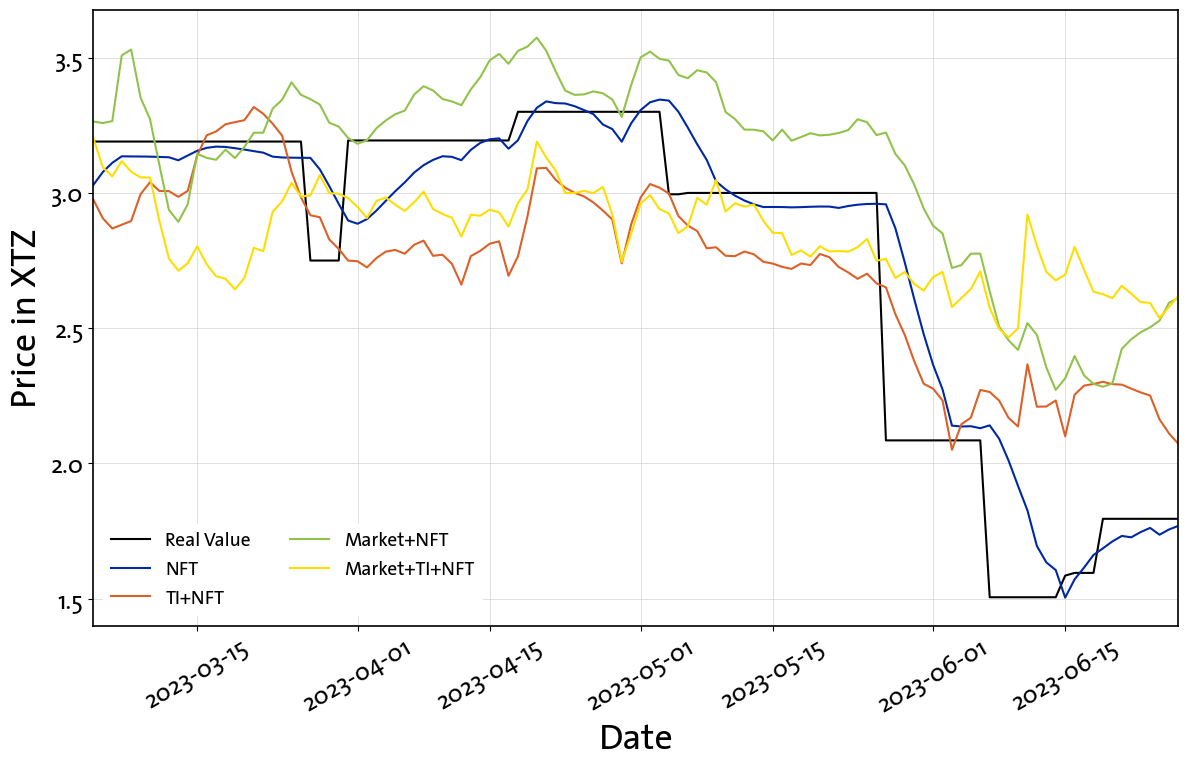

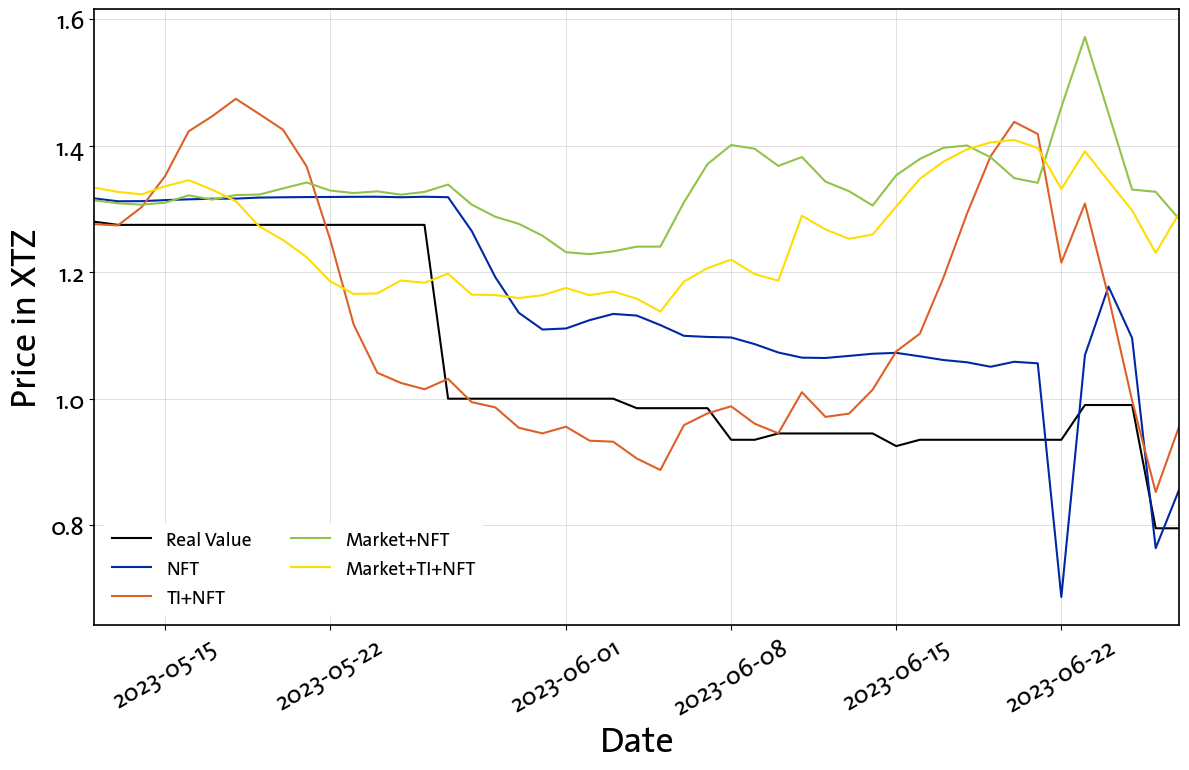

here


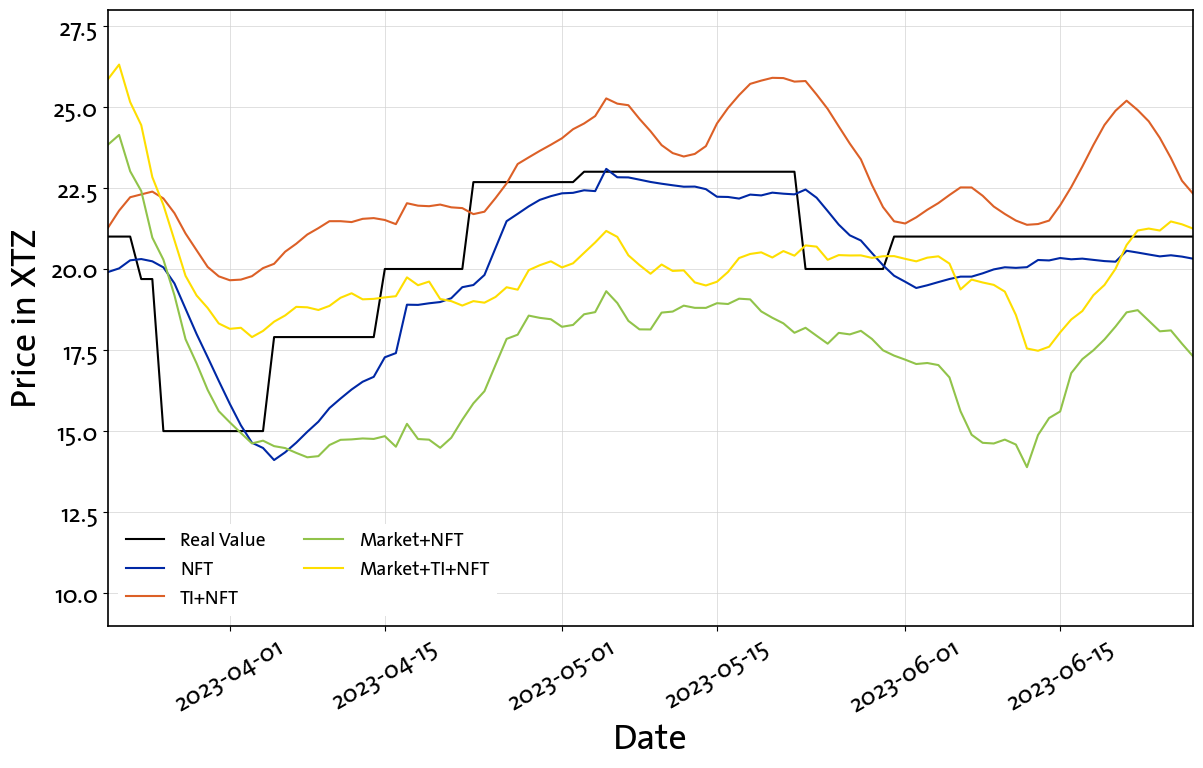

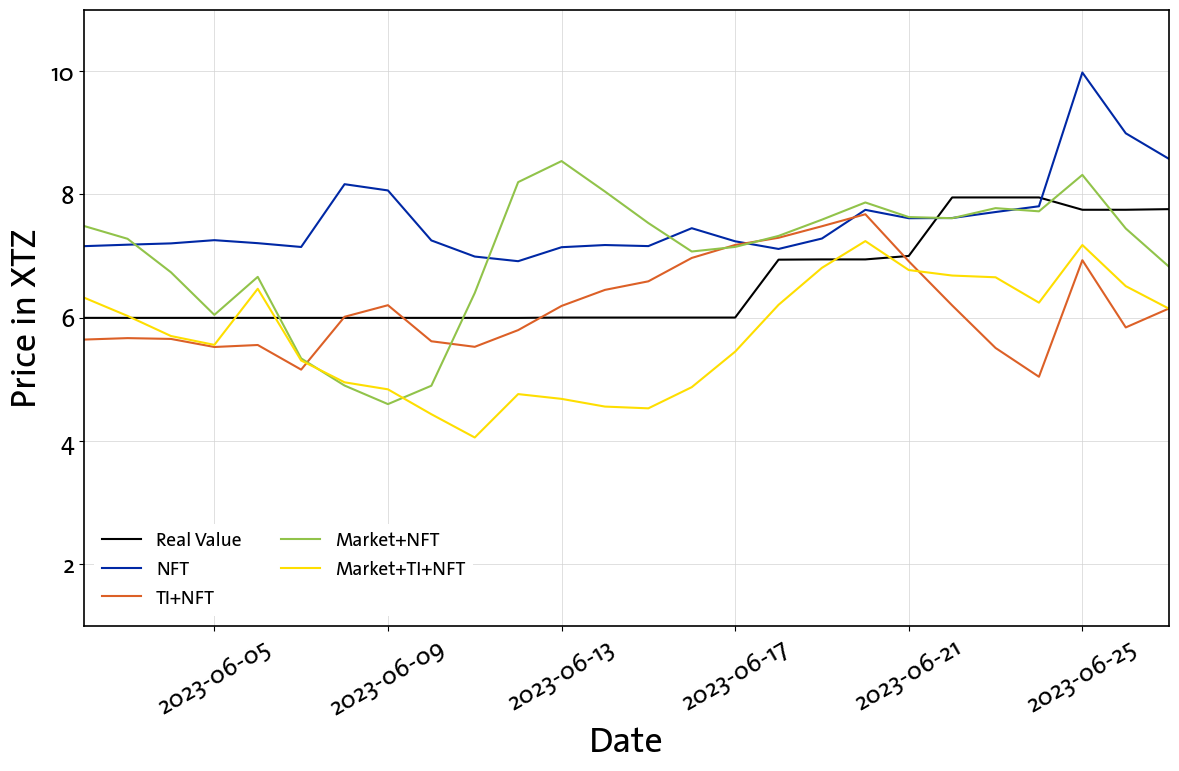

In [4]:
for j, file_name in enumerate(os.listdir(nft_predictions_dir)):
    predictions = np.load(nft_predictions_dir + file_name, allow_pickle=True)

    y_df = pd.read_csv(nft_dir + file_name.replace("Predictions_", "").replace(".npy", "") + ".csv")
    y_df.Date = pd.to_datetime(y_df.Date)
    y_df = shorten_df(y_df, dates = dates, start_date=min(y_df.Date), end_date=end_date)

    y = y_df.price.values

    pred = pd.DataFrame(predictions)
    NFT_name  = file_name.replace(".csv", "")

    y_pred = pred.loc[0, 4]
    y_tgt = y[-len(y_pred):]
    x = pd.to_datetime(y_df.Date.values[-len(y_pred):])

    plt.figure(figsize = (14, 8))
    plt.plot(x, y_tgt, color="black", label = "Real Value")

    for i, row in pred.iterrows():
        y_pred = pred.loc[i, 4]
        indexes_included = np.where(pred.loc[i, 1:3].values == 1)[0]
        label = "+".join(np.array(data_names)[indexes_included])
        plt.plot(x, y_pred,  label=label)

    plt.grid(zorder=1000, lw =0.5, color = 'lightgray')
    leg = plt.legend(frameon=True,facecolor='white', framealpha=1, loc='lower left', fontsize=14, ncol = 2)
    frame = leg.get_frame()
    frame.set_linewidth(0)
    plt.xlabel("Date")
    plt.xticks(rotation=30)

    plt.ylabel("Price in XTZ")
    if j == 2:
        print("here")
        plt.ylim((9, 28))
    elif j == 3:
        plt.ylim(1, 11)

    plt.xlim(min(x), max(x))
    file_name = NFT_name.replace(".npy", ".png").replace("Predictions_", "")
    plt.savefig(nft_figures_dir + file_name, bbox_inches = "tight")
    plt.show()